### '한국 복지 패널 데이터'를 이용한 데이터 분석
- 연령별 급여 수령 금액 분석, IT 관련 분석

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)     # 행은 최대 100까지 출력
pd.set_option('display.max_columns', None) # 열은 무제한 출력

In [45]:
raw = pd.read_spss('./Koweps_hpwc17_2022_beta1.sav');
print(type(raw))

<class 'pandas.core.frame.DataFrame'>


In [46]:
# 1~17차 머지데이터_변수명.xlsx
raw=raw.rename(
columns={'h17_g3'     : 'gender',         #  성별, 1: 남, 2: 여
         'h17_g4'     : 'birth',          #  태어난 연도
         'h17_g10'    : 'marriage_type',  #  혼인 상태
         'h17_g11'    : 'religion',       #  종교 
         'p1702_8aq1' : 'income',         #  일한달의 월 평균 임금 
         'h17_eco9'   : 'code_job',       #  직업 코드
         'h17_reg7'   : 'code_region'})   #  7개 권역별 지역구분

### 연령별 급여 수령 금액 분석, IT 관련 분석

In [4]:
df = raw.copy()
df.head(1)

,h17_id,h17_ind,h17_sn,h17_merkey,h_new,h_new1,h17_cobf,p17_wsc,p17_wsl,p17_wgc,p17_wgl,p17_wsc_all,p17_wsl_all,p17_wgc_all,p17_wgl_all,p17_wsc_n_all,p17_wsl_n_all,p17_wgc_n_all,p17_wgl_n_all,h17_reg5,code_region,h17_din,h17_cin,h17_flag,h17_hc,h17_hc_all,h17_hc_n_all,nh1701_1,nh1701_2,h1701_1,h17_pind,h17_pid,h17_g1,h17_g2,gender,birth,h17_g6,h17_g7,h17_g8,h17_g9,marriage_type,religion,h17_g12,h1701_110,h1701_11aq2,h1701_11aq3,h1701_11aq5,h1701_11aq6,h1701_11aq8,h1701_11aq10,h17_med1,h17_med2,h17_med3,h17_med4,h17_med5,h17_med6,h17_med7,h17_med8,h17_g9_1,h17_med9,h17_med10,h17_eco1,h17_eco2,h17_eco3,h17_eco4,h17_eco4_1,h17_eco5_1,h17_eco6,h17_eco_7_1,h17_eco_7_2,h17_eco_7_3,h17_eco8,code_job,h17_eco10,h17_eco11,h17_soc1,h17_soc_2,h17_soc_3,h17_soc_4,h17_soc_5,h17_soc_6,h17_soc_7,h17_soc_8,h17_soc_9,h17_soc_10,h17_soc_11,h17_soc8,h17_soc9,h17_soc11,h17_soc10,h17_soc_12,h17_soc_13,h1705_1,h1705_3aq1,h1705_2,h1705_3,h1705_4,h1705_5,h1705_6,h1705_7,nh1705_8,nh1705_9,h1705_3aq2,h1706_aq1,h1706_14aq1,h1706_1,h1706_2,h1706_4,h1706_5,h1706_3,h1706_3_16aq1,h1706_6,h1706_8,h1706_9,h1706_aq2,h1706_aq3,h1706_10,h1706_11,h1706_12,h1706_13,h1706_14,h1706_15,h1706_21,h1706_22,h1706_23,h1706_24,h1706_25,h1706_27,h1706_30,h1706_33,h1706_36,h1706_39,h1706_14aq2,h1706_3aq1,h1707_3aq1,h1707_3aq2,h1707_5aq1,h1707_3aq3,h1707_sub1,h1707_3aq4,h1707_3aq5,h1707_6aq1,h1707_3aq6,h1707_5aq2,h1707_3aq7,h1707_3aq8,h1707_3aq9,h1707_3aq10,h1707_3aq11,h1707_5aq3,h1707_5aq4,h1707_3aq13,h1707_6aq4,h1707_6aq6,h1707_13aq1,h1707_3aq14,h1707_3aq15,h1707_3aq16,h1707_3aq17,h1707_4,h1707_6aq7,h1707_6aq8,h1707_6aq9,h1707_6aq10,h1707_6aq11,h1707_5,h1707_6aq12,h1707_6aq13,h1707_6aq14,h1707_9,h17_inc1,h17_inc2_1,h17_inc2_2,h17_inc3_1,h17_inc3_2,h17_inc4_1,h17_inc4_2,h17_inc5_1,h17_inc5_2,h17_inc6_1,h17_inc6_2,h17_inc7_1,h17_inc7_2,h1708_106,h1708_107,h1708_108,h1708_109,h1708_110,h1708_111,h17_inc2_3,h17_inc2,h17_inc3_6,h17_inc3,h17_inc4_7,h17_inc4,h17_inc4_8,h17_inc4_9,h1708_155,h1708_156,h1708_157,h1708_158,h1708_160,h1708_159,h1708_3aq3,h1708_161,h1708_162,h1708_163,h1708_164,h1708_166,h1708_165,h1708_3aq4,h1708_167,h1708_168,h1708_169,h1708_170,h17_inc7_3,h17_inc7,h1708_aq9,h1708_aq10,h1708_aq11,h1708_aq12,h1708_14aq1,h1708_14aq2,h1708_aq13,h1708_aq14,h1708_aq15,h1708_6aq1,h1708_aq16,h1708_10aq1,h1708_aq19,h1708_aq20,h1708_aq21,h1708_5aq3,h1708_14aq3,h1708_aq22,h1708_aq23,h1708_aq24,h1708_4aq116,h1708_4aq117,h1708_5aq1,h1708_11aq1,h1708_7aq4,h1708_7aq6,h1708_7aq8,h1708_aq25,h1708_15aq1,h1708_16aq1,h1708_aq26,h1708_aq27,h1708_aq28,h1708_aq29,h1708_3aq5,h1708_4aq118,h1708_aq30,h1708_6aq3,h1708_3aq6,h1708_3aq7,nh1708_3aq1,h1708_aq32,h1708_aq33,h1708_aq34,h1708_11aq2,h1708_11aq3,h1708_11aq4,h1708_11aq5,h1708_11aq7,h1708_11aq8,h1709_aq1,h1709_aq2,h1709_aq3,h1709_aq4,h1709_aq5,h1709_aq6,h1709_aq7,h1709_aq8,h1709_12aq1,h1709_12aq2,h1709_12aq3,h1709_12aq4,h1709_12aq5,h1709_12aq6,h1709_12aq7,h1709_12aq11,h1709_12aq21,h1709_12aq31,h1709_12aq41,h1709_12aq51,h1709_12aq61,h1709_12aq71,h1710_aq1,h1710_aq2,h1710_aq3,h1710_aq4,h1710_aq5,h1710_aq6,h1710_aq7,h1710_aq8,h1710_aq9,h1710_aq10,h1710_aq11,h1710_aq12,h1710_aq13,h1710_aq14,h1710_aq15,h1710_aq16,h1710_aq17,h1710_aq18,h1710_aq19,h1710_aq20,h1710_26,h1710_27,h1710_aq23,h1710_aq24,h1710_aq25,h1710_aq26,h1711_2,h1711_3,h1711_4,h1711_5,h1711_6,h1711_7,h1711_8,h1711_3aq1,h1711_3aq2,h1711_3aq3,h1711_3aq4,h1711_3aq5,h1711_3aq6,h1711_3aq7,h1712_2_11aq1,h1712_2_11aq2,h1712_2_11aq3,h1712_2_11aq4,h1712_2_11aq5,h1712_2_11aq6,h1712_2_11aq7,h1712_2_11aq8,h1712_2_11aq9,h1712_2_11aq10,h1712_2_11aq11,h1712_2_11aq12,h1712_2_11aq13,h1712_2_11aq14,h1712_2_11aq15,h1712_2_11aq16,h1712_2_12aq1,h1712_2_11aq17,h1712_2_12aq2,h1712_2_11aq18,h1712_2_12aq3,h1712_2_11aq19,h1712_2_12aq4,h1712_2_11aq20,h1712_2_12aq5,h1712_2_11aq21,h1712_2_12aq6,h1712_2_11aq23,h1712_2_12aq7,h1712_2_11aq24,h1712_2_12aq8,h1712_2_11aq25,h1712_2_12aq9,h1712_2_11aq26,h1712_2_12aq10,h1712_2_11aq27,h1712_2_12aq11,h1712_2_11aq28,h1712_2_12aq12,h1712_2_11aq30,h1712_2_12aq13,h1712_2_11aq

In [5]:
df['birth'].head()

0    1945.0
1    1948.0
2    1942.0
3    1962.0
4    1963.0
Name: birth, dtype: float64

In [6]:
df['birth'].describe()
# 출생 연도의 평균: 1969.066241
# 표준 편차: 24.158054

count    16591.000000
mean      1969.066241
std         24.158054
min       1906.000000
25%       1949.000000
50%       1965.000000
75%       1988.000000
max       2021.000000
Name: birth, dtype: float64

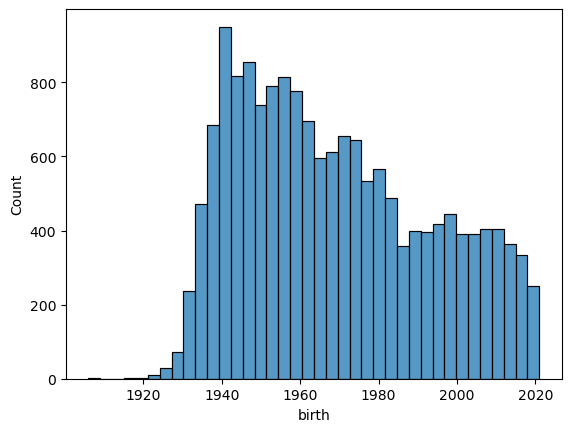

In [7]:
sns.histplot(data=df, x='birth');

In [8]:
df['birth'].isnull().sum()

0

In [9]:
df.query('birth==9999')['birth'].sum()
# 9999년 생만 추출 -> birth 컬럼 추출 -> sum()
# 0이면 이상치가 없음.

0.0

In [10]:
df['age'] = (2023 - df['birth']) # 만나이
df['age'].describe()

count    16591.000000
mean        53.933759
std         24.158054
min          2.000000
25%         35.000000
50%         58.000000
75%         74.000000
max        117.000000
Name: age, dtype: float64

In [11]:
df = df.assign(age=(2023 - df['birth']))
df['age'].describe()

count    16591.000000
mean        53.933759
std         24.158054
min          2.000000
25%         35.000000
50%         58.000000
75%         74.000000
max        117.000000
Name: age, dtype: float64

In [12]:
# 나이별 월급 평균표
df = df.dropna(subset=['age', 'income']).groupby(['age']).agg(income_mean=('income', 'mean'))
df.head()
# print(df['age'].isnull().sum())
# print(df['income'].isnull().sum())

,income_mean
age,
20.0,171.666667
21.0,132.555556
22.0,149.409091
23.0,149.810811
24.0,166.413043


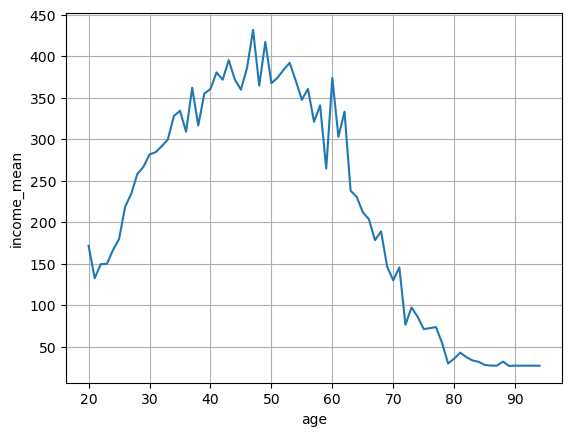

In [13]:
sns.lineplot(data=df, x='age', y='income_mean');
plt.grid(True)
plt.show()

In [14]:
# it 직군 연령별 급여 분포
# 필요한 변수만 선정
df1 = raw.copy()
df1 = df1[['gender', 'income', 'code_job', 'birth']].dropna(subset=['birth', 'income']) # income에 값이 없으면 레코드 삭제
df1 = df1.query('code_job in [222, 223, 224]')
df1.head(5)

,gender,income,code_job,birth
117,1.0,250.0,223.0,1983.0
143,1.0,520.0,222.0,1980.0
149,1.0,240.0,222.0,1994.0
254,1.0,330.0,222.0,1979.0
289,1.0,851.0,222.0,1974.0


In [15]:
df1.shape

(76, 4)

In [16]:
df1 = df1.assign(age = (2023-df1['birth']))
df1.head(3)

,gender,income,code_job,birth,age
117,1.0,250.0,223.0,1983.0,40.0
143,1.0,520.0,222.0,1980.0,43.0
149,1.0,240.0,222.0,1994.0,29.0


In [17]:
df1 = df1.groupby(['age'], as_index=False).agg(income_mean = ('income', 'mean'))
df1.head()

,age,income_mean
0,21.0,220.0
1,22.0,260.0
2,26.0,290.0
3,27.0,285.5
4,28.0,220.0


In [18]:
# 비it 직군 연령별 급여 분포
# 필요한 변수만 선정
df2 = raw.copy()
df2 = df2[['gender', 'income', 'code_job', 'birth']].dropna(subset=['birth', 'income']) # income에 값이 없으면 레코드 삭제
df2 = df2.query('code_job not in [222, 223, 224]')
df2.head(5)

,gender,income,code_job,birth
1,1.0,172.0,942.0,1948.0
2,1.0,100.0,762.0,1942.0
3,1.0,268.0,855.0,1962.0
4,2.0,140.0,399.0,1963.0
8,2.0,27.0,941.0,1940.0


In [19]:
df2.shape

(5557, 4)

In [20]:
df2 = df2.assign(age = (2023-df2['birth']))
df2.head(3)

,gender,income,code_job,birth,age
1,1.0,172.0,942.0,1948.0,75.0
2,1.0,100.0,762.0,1942.0,81.0
3,1.0,268.0,855.0,1962.0,61.0


In [21]:
df2 = df2.groupby(['age'], as_index=False).agg(income_mean=('income', 'mean'))
df2.head()

,age,income_mean
0,20.0,171.666667
1,21.0,127.411765
2,22.0,144.142857
3,23.0,149.810811
4,24.0,166.413043


In [22]:
df1['gubun'] = 'it'
df2['gubun'] = 'not it'
display(df1.head(1))
display(df2.head(1))

,age,income_mean,gubun
0,21.0,220.0,it


,age,income_mean,gubun
0,20.0,171.666667,not it


In [23]:
df3 = pd.concat([df1, df2])
print(df3.shape)
display(df3)

(105, 3)


,age,income_mean,gubun
0,21.0,220.000000,it
1,22.0,260.000000,it
2,26.0,290.000000,it
3,27.0,285.500000,it
4,28.0,220.000000,it
...,...,...,...
69,89.0,26.714286,not it
70,90.0,27.000000,not it
71,91.0,27.000000,not it
72,92.0,27.000000,not it


In [24]:
df3.index.value_counts().head(10) # it, not it 2개씩 존재함으로 index가 중복됨.

0     2
16    2
1     2
30    2
29    2
28    2
27    2
25    2
24    2
23    2
Name: count, dtype: int64

In [25]:
df3.reset_index(drop=False) # 기존 index가 컬럼으로 할당됨

,index,age,income_mean,gubun
0,0,21.0,220.000000,it
1,1,22.0,260.000000,it
2,2,26.0,290.000000,it
3,3,27.0,285.500000,it
4,4,28.0,220.000000,it
...,...,...,...,...
100,69,89.0,26.714286,not it
101,70,90.0,27.000000,not it
102,71,91.0,27.000000,not it
103,72,92.0,27.000000,not it


In [26]:
df3.reset_index(drop=True, inplace=True)
df3.index.value_counts().head(10) # index의 갯수를 산출하여 10개의 레코드만 출력

0     1
53    1
77    1
76    1
75    1
74    1
73    1
72    1
71    1
70    1
Name: count, dtype: int64

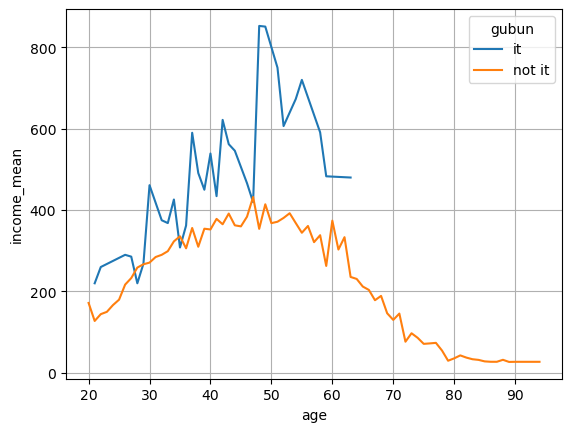

In [27]:
sns.lineplot(data=df3, x='age', y='income_mean', hue='gubun');
plt.grid(True)
plt.show()

### 연령대에 따른 월급 차이 분석

In [28]:
df = raw.copy()
df = df.assign(age=(2023-df['birth']))
df['age'].head()

0    78.0
1    75.0
2    81.0
3    61.0
4    60.0
Name: age, dtype: float64

In [29]:
# 연령대 파생 변수  생성
df=df.assign(ageg=np.where(df['age'] < 30, 'young', np.where(df['age'] < 60, 'middle', 'old')))
df[['age', 'ageg']].head(10)

,age,ageg
0,78.0,old
1,75.0,old
2,81.0,old
3,61.0,old
4,60.0,old
5,20.0,young
6,96.0,old
7,89.0,old
8,83.0,old
9,53.0,middle


In [30]:
# 함수 적용
def ageg(x):
  grade=''
  
  if x < 30:
    grade='young'
  elif x < 60:
    grade='middle'
  else:
    grade='old'
  
  return grade

df['ageg'] = df['age'].apply(ageg)
df[['age', 'ageg']].head(10)  

,age,ageg
0,78.0,old
1,75.0,old
2,81.0,old
3,61.0,old
4,60.0,old
5,20.0,young
6,96.0,old
7,89.0,old
8,83.0,old
9,53.0,middle


In [31]:
df['ageg'].value_counts()

ageg
old       7950
middle    5244
young     3397
Name: count, dtype: int64

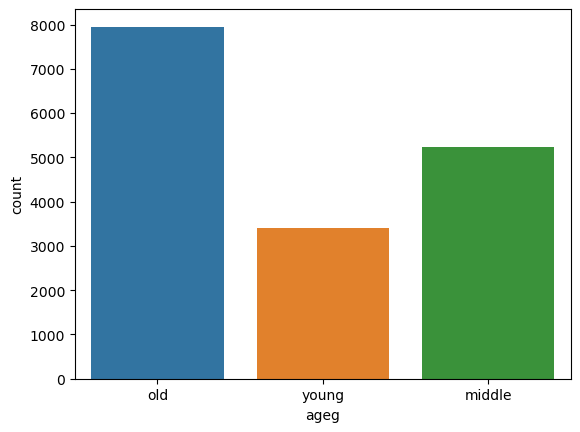

In [32]:
sns.countplot(data=df, x='ageg');

In [33]:
# 연령대에 따른 월급 차이 분석, 연령대별 월급 평균 표 제작
income_ageg = df.dropna(subset=['income']).groupby('ageg', as_index=False).agg(income_mean=('income', 'mean'))
income_ageg

,ageg,income_mean
0,middle,355.909935
1,old,153.986702
2,young,217.011494


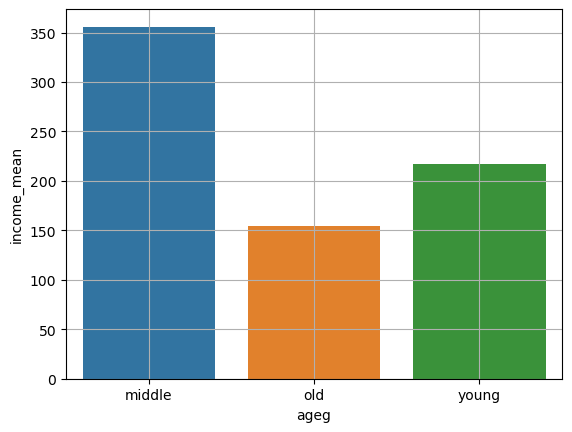

In [34]:
sns.barplot(data=income_ageg, x='ageg', y='income_mean')
plt.grid(True)
plt.show()

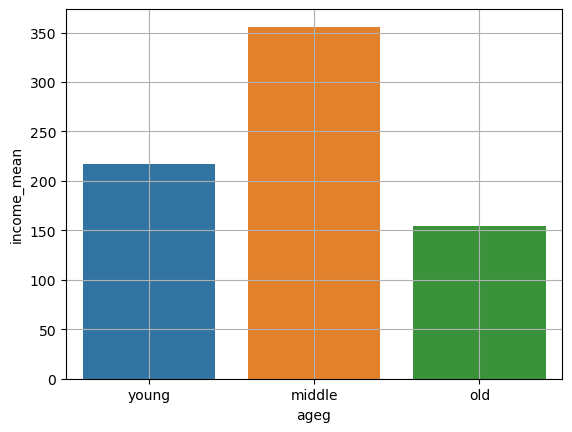

In [35]:
# 정렬
sns.barplot(data=income_ageg, x='ageg', y='income_mean', order=['young', 'middle', 'old'])
plt.grid(True)
plt.show()

In [37]:
# 연령대 및 성별 월급 분포 막대 그래프
gender_income = df.dropna(subset=['income']).groupby(['ageg', 'gender'], as_index=False).agg(income_mean=('income', 'mean'))
gender_income

,ageg,gender,income_mean
0,middle,1.0,434.403814
1,middle,2.0,259.256215
2,old,1.0,240.059840
3,old,2.0,96.604610
4,young,1.0,224.523810
5,young,2.0,211.955128


In [38]:
gender_income['gender'] = np.where(gender_income['gender'] == 1, 'male', 'female')
gender_income

,ageg,gender,income_mean
0,middle,male,434.403814
1,middle,female,259.256215
2,old,male,240.059840
3,old,female,96.604610
4,young,male,224.523810
5,young,female,211.955128


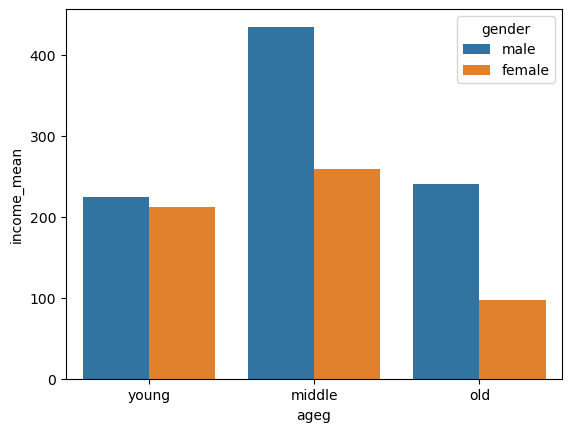

In [42]:
sns.barplot(data=gender_income, x='ageg', y='income_mean', hue='gender', order=['young', 'middle','old']);

### 나이 및 성별 월급 추세

In [53]:
df = raw.copy()

In [54]:
df['gender'] = np.where(df['gender'] == 1, 'male', 'female')
df['gender'].head()

0    female
1      male
2      male
3      male
4    female
Name: gender, dtype: object

In [55]:
df['gender'].value_counts()

gender
female    9120
male      7471
Name: count, dtype: int64

In [56]:
df['age'] = (2023 - df['birth']) # 만나이

In [57]:
ageg_gender = df.dropna(subset=['income']).groupby(['age','gender'], as_index=False).agg(income_mean = ('income', 'mean'))
ageg_gender

,age,gender,income_mean
0,20.0,female,171.666667
1,21.0,female,121.285714
2,21.0,male,139.727273
3,22.0,female,141.266667
4,22.0,male,166.857143
...,...,...,...
141,91.0,female,27.000000
142,91.0,male,27.000000
143,92.0,female,27.000000
144,92.0,male,27.000000


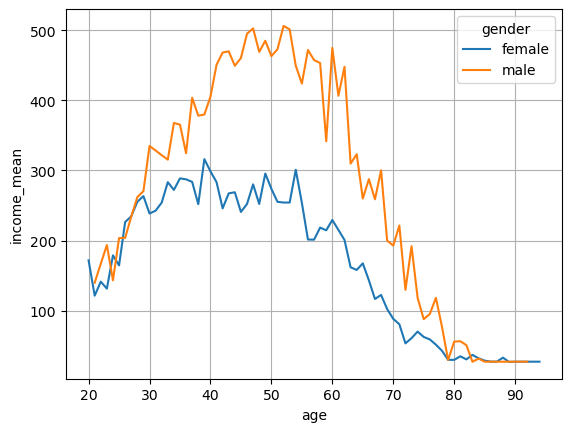

In [59]:
sns.lineplot(data=ageg_gender, x='age', y='income_mean', hue='gender');
plt.grid(True)
plt.show()

### IT 직종의 년령별 성별 추세

In [66]:
df = raw.copy()

df['age'] = (2023 - df['birth']) # 만나이
df = df.query('code_job in [222, 223, 224]')
df['gender'] = np.where(df['gender'] == 1, 'male', 'female')
df['code_job'].head(5)

117    223.0
143    222.0
149    222.0
254    222.0
289    222.0
Name: code_job, dtype: float64

In [67]:
df.shape

(80, 844)

In [71]:
df['gender'].value_counts()

gender
male      65
female    15
Name: count, dtype: int64

In [68]:
it_gender = df.dropna(subset=['income']).groupby(['age', 'gender'], as_index=False).agg(income_mean=('income', 'mean'))
it_gender.head(5)

,age,gender,income_mean
0,21.0,male,220.0
1,22.0,male,260.0
2,26.0,female,290.0
3,27.0,male,285.5
4,28.0,male,220.0


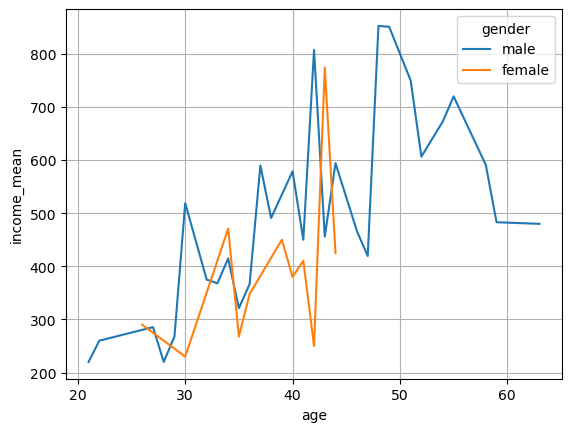

In [70]:
sns.lineplot(data=it_gender, x='age', y='income_mean', hue='gender')
plt.grid(True)
plt.show()